### Predicting the Severity of Automobile Accidents in Seattle, Washington ###

In [1]:
# Import packages and modules.
import io
import itertools
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import pandas as pd
import pylab as pl
import scipy
import scipy.optimize as opt
import seaborn as sns
import sklearn
import sys
from matplotlib.ticker import NullFormatter
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.sparse import csr_matrix
from sklearn import linear_model
from sklearn import metrics
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In this first week, you will discover your
project objectives, find your dataset that you will use for this capstone project, and publish your
dataset on GitHub.

In the second week, you will build your machine
learning solution.

In the third week,
you will finalize your model and be ready
to submit your work.

To complete capstone,
you will be working on a case study which is to predict the severity
of an accident.
Now, wouldn't it be great if there were something in place that could warn you, 
given the weather and the road conditions,
about the possibility of you getting into a car accident and how severe it would be,
so that you would drive more carefully or even change your travel plans?
Let's use our shared data for Seattle, Washington as an example of how to deal with the accidents data.

In [2]:
# This function takes no arguments and returns an integer representing
# the system time elapsed in seconds from a fixed instant of time.
# This function requires the os package to be imported.
# Specifically, it uses built-in function times() from module posix.
def time_now():
    return os.times()[4]

In [3]:
# Define a global variable to store the starting time for this notebook.
global notebook_start_time 
notebook_start_time = time_now()

In [4]:
# This function computes the time elapsed in seconds from the 
# time represented by the first parameter (start_time)
# to the time represented by the second parameter (end_time)
# This function requires the os package to be imported.
def elapsed_time(start_time = notebook_start_time):
    return time_now() - start_time   

In [5]:
# This function prints the time elapsed in seconds from the 
# time represented by the first parameter (start_time)
# to the time represented by the second parameter (end_time)
# This function requires the os package to be imported.
def print_elapsed_time(start_time = notebook_start_time):
    print("Elapsed time is", elapsed_time(start_time), "seconds.")
    return None

In [6]:
print_elapsed_time()

Elapsed time is 0.3199999965727329 seconds.


In [7]:
# Create a list of display options.
list_of_display_options_fully_qualified_names = str(\
"pd.options.display.chop_threshold, pd.options.display.float_format, pd.options.display.max_info_columns, pd.options.display.notebook_repr_html, \
pd.options.display.colheader_justify, pd.options.display.html, pd.options.display.max_info_rows, pd.options.display.pprint_nest_depth, \
pd.options.display.column_space, pd.options.display.large_repr, pd.options.display.max_rows, pd.options.display.precision, \
pd.options.display.date_dayfirst, pd.options.display.latex, pd.options.display.max_seq_items, pd.options.display.show_dimensions, \
pd.options.display.date_yearfirst, pd.options.display.max_categories, pd.options.display.memory_usage, pd.options.display.unicode, \
pd.options.display.encoding, pd.options.display.max_columns, pd.options.display.min_rows, pd.options.display.width, \
pd.options.display.expand_frame_repr, pd.options.display.max_colwidth, pd.options.display.multi_sparse").split(sep=', ')

# Initialize an empty list to store all the short names for display options.
list_of_display_options_short_names = list()
# For each fully qualified option name,
# get the option's short name and add it to the list of short names.
for fully_qualified_option_name in list_of_display_options_fully_qualified_names:
    # Get short option name.
    short_option_name = fully_qualified_option_name.split(sep='.')[-1]
    
    # Add short option name to list of display option short names.
    list_of_display_options_short_names.append(short_option_name)

# Define dictionary of display option settings.
dict_of_display_option_settings_short_names=\
{"max_info_columns": 1000,\
"colheader_justify": "right",\
"max_info_rows": 1000000,\
"column_space": 1000,\
"max_rows": 1000000,\
"precision": 9,\
"max_seq_items": 1000000000000,\
"show_dimensions": True,\
"max_categories": 100,\
"memory_usage": True,\
"max_columns": 1000,\
"max_colwidth": 1000,\
"float_format": lambda x: '%.9f' % x}

# Set pandas display options using dictionary of short names,
# and display the options/value pairs.
print("Setting display options...")
for key in list(dict_of_display_option_settings_short_names.keys()):
    # Set display option.
    pd.set_option(key, dict_of_display_option_settings_short_names[key])
    # Print display option name and value.
    print(key, ": ", pd.get_option(key), sep='')

Setting display options...
max_info_columns: 1000
colheader_justify: right
max_info_rows: 1000000
column_space: 1000
max_rows: 1000000
precision: 9
max_seq_items: 1000000000000
show_dimensions: True
max_categories: 100
memory_usage: True
max_columns: 1000
max_colwidth: 1000
float_format: <function <lambda> at 0x7f84c61b21f0>


In [8]:
# Attribute Information URL: https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf
# Read the Collisions Data CSV file and store it as a DataFrame.
# url="https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv" # HTTPError at 202009151050, using local copy of .csv instead.
# print(os.listdir("..")) # Print list of contents of current working directory.
local_path_to_csv = "../Collisions.csv"
df=pd.read_csv(local_path_to_csv, low_memory=False)

In [9]:
# View the first few rows of the collisions DataFrame.
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.320757054,47.609407946,1,328476,329976,EA08706,Matched,Block,nan,BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE,,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2020/01/22 00:00:00+00,1/22/2020 3:21:00 PM,Mid-Block (not related to intersection),11.000000000,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE",NaN,N,Raining,Wet,Dark - Street Lights On,NaN,nan,NaN,11,From same direction - both going straight - both moving - sideswipe,0,0,N
1,-122.319560827,47.662220664,2,328142,329642,EA06882,Matched,Block,nan,8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST,,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2020/01/07 00:00:00+00,1/7/2020 8:00:00 AM,Mid-Block (not related to intersection),15.000000000,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE",NaN,N,Clear,Dry,Daylight,NaN,nan,NaN,32,One parked--one moving,0,0,Y
2,-122.327524508,47.604393273,3,20700,20700,1181833,Unmatched,Block,nan,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004/01/30 00:00:00+00,1/30/2004,Mid-Block (but intersection related),11.000000000,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE",NaN,NaN,NaN,NaN,NaN,NaN,4030032.000000000,NaN,NaN,NaN,0,0,N
3,-122.327524934,47.708621579,4,332126,333626,M16001640,Unmatched,Block,nan,NE NORTHGATE WAY BETWEEN 1ST AVE NE AND NE NORTHGATE DR,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2016/01/23 00:00:00+00,1/23/2016,Mid-Block (not related to intersection),11.000000000,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE",NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,,NaN,0,0,N
4,-122.292120049,47.559009080,5,328238,329738,3857118,Unmatched,Block,nan,M L KING JR ER WAY S BETWEEN S ANGELINE ST AND S EDMUNDS ST,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2020/01/26 00:00:00+00,1/26/2020,Mid-Block (not related to intersection),28.000000000,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,,NaN,0,0,N


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221389 entries, 0 to 221388
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213918 non-null  float64
 1   Y                213918 non-null  float64
 2   OBJECTID         221389 non-null  int64  
 3   INCKEY           221389 non-null  int64  
 4   COLDETKEY        221389 non-null  int64  
 5   REPORTNO         221389 non-null  object 
 6   STATUS           221389 non-null  object 
 7   ADDRTYPE         217677 non-null  object 
 8   INTKEY           71884 non-null   float64
 9   LOCATION         216801 non-null  object 
 10  EXCEPTRSNCODE    100986 non-null  object 
 11  EXCEPTRSNDESC    11779 non-null   object 
 12  SEVERITYCODE     221388 non-null  object 
 13  SEVERITYDESC     221389 non-null  object 
 14  COLLISIONTYPE    195159 non-null  object 
 15  PERSONCOUNT      221389 non-null  int64  
 16  PEDCOUNT         221389 non-null  int6

<h2 id="data_wrangling">Data Wrangling</h2>

Steps for working with missing data:
<ol>
    <li>Identify missing data.</li>
    <li>Deal with missing data.</li>
    <li>Correct data format.</li>
</ol>

<h3 id="identifying_missing_data">Identifying Missing Data</h3>

The metadata document that accompanied the data set indicates that certain columns have "sentinel" values
that indicate an unknown or missing value. Each of these missing values will first be converted into NaN.
Subsequently, the NaN values will be dropped from the DataFrame.

In [11]:
# If any row of the collisions DataFrame contains a sentinel value representing "unknown",
# then replace it with NaN. 
# Sentinels for "unknown" are listed in the metadata document that accompanies the dataset.
df_unknowns_converted_to_nan = df.replace(to_replace=\
{"EXCEPTRSNCODE": " ",\
 "EXCEPTRSNDESC": "Not Enough Information, or Insufficient Location Information",\
 "SEVERITYCODE": "0",\
 "SEVERITYDESC": "Unknown",\
 "JUNCTIONTYPE": "Unknown",\
 "WEATHER": "Unknown",\
 "ROADCOND": "Unknown",\
 "LIGHTCOND": "Unknown",\
 "SDOT_COLCODE": float(0),\
 "SDOT_COLDESC": "NOT ENOUGH INFORMATION / NOT APPLICABLE",\
 "ST_COLCODE": " ",\
 "ST_COLDESC": "Not stated"},\
value=np.nan, inplace=False, limit=None, regex=False, method='pad')

df_unknowns_converted_to_nan.replace(to_replace={"ST_COLCODE": "0", }, value=np.nan, inplace=True, limit=None, regex=False, method='pad')

<h3 id="deal_with_missing_data">Deal with Missing Data</h3>

<ol>
    <li>Drop the Data
        <ol>
            <li>Drop entire row.</li>
            <li>Drop entire column.</li>
        </ol>
    </li>
    <li>Replace the Data
        <ol>
            <li>Replace data by mean.</li>
            <li>Replace data by frequency.</li>
            <li>Replace data based on other functions.</li>
        </ol>
    </li>
        
</ol>

Whole columns should be dropped only if most entries in the column are empty.

In [12]:
# Initialize a list to store the labels for the columns with missing data.
list_of_columns_with_missing_data = list()

# For each column in the collisions DataFrame,
# if the column contains at least one NaN, 
# then add the column's label to the list.
for column in list(df_unknowns_converted_to_nan.columns):
    if df_unknowns_converted_to_nan[column].hasnans:
        list_of_columns_with_missing_data.append(column)

In [13]:
print(list(df.columns))

['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']


In [14]:
# Drop any column from the collisions DataFrame if it satisfies at least one of the following conditions:
# 1) more than 15% of the column's data is NaN;
# 2) the column only contains unique identification keys, or information not useful for model building;
# 3) the column's data is categorical but does not fit into a small (< 15) number of categories;
# 4) information in the column is redundant because it is already represented by another column;
# 5) it is not clear how to interpret the column's data.
list_of_columns_to_drop = ["ADDRTYPE",\
                           "STATUS",\
                           "OBJECTID",\
                           "INCKEY",\
                           "COLDETKEY",\
                           "REPORTNO",\
                           "INTKEY",\
                           "LOCATION",\
                           "EXCEPTRSNCODE",\
                           "EXCEPTRSNDESC",\
                           "SEVERITYDESC",\
                           "INCDATE",\
                           "INCDTTM",\
                           "JUNCTIONTYPE",\
                           "SDOT_COLCODE",\
                           "SDOT_COLDESC",\
                           "INATTENTIONIND",\
                           "UNDERINFL",\
                           "PEDROWNOTGRNT",\
                           "SDOTCOLNUM",\
                           "SPEEDING",\
                           "ST_COLCODE",\
                           "ST_COLDESC",\
                           "SEGLANEKEY",\
                           "CROSSWALKKEY",\
                           "HITPARKEDCAR"]

In [15]:
# Drop the selected columns from the DataFrame after converting unknowns to NaN.
# Store the result in a new DataFrame.
df_drop_columns = df_unknowns_converted_to_nan.drop(columns=list_of_columns_to_drop, inplace=False)

In [16]:
# Drop any row that contains at least one NaN.
df_drop_columns_and_rows = df_drop_columns.dropna(axis="index", how="any", thresh=None, subset=None, inplace=False)

In [17]:
print_elapsed_time()

Elapsed time is 18.559999998658895 seconds.


<h3 id="correct_data_format">Correct Data Format</h3>

Ensure that each data type is appropriate for the corresponding feature.
Cast columns of type "object" as type "category", but leave all other column types unaltered.

In [18]:
# Create new DataFrame to store converted data types.
df_converted = pd.DataFrame()

for column in list(df_drop_columns_and_rows.columns):
    if (df_drop_columns_and_rows[column].dtype in [np.dtype('object')]):
        df_converted[column] = df_drop_columns_and_rows[column].astype('category')
    # Copy all other columns to new DataFrame without changing their types.
    else:
        df_converted[column] = df_drop_columns_and_rows[column]

In [19]:
print_elapsed_time()

Elapsed time is 19.099999997764826 seconds.


In [20]:
# Cast columns "INCDTTM" to type datetime.
    #if column in ["INCDTTM"]:
    #    df_converted[column] = pd.to_datetime(df_drop_columns_and_rows[column], infer_datetime_format=True)
    # Cast columns of type object to type category

In [21]:
# Create DataFrame of categorical columns.
df_categorical = df_converted.select_dtypes(include="category")

<h2 id="Feature Selection"> Feature selection</h2>

#### Features before One Hot Encoding

In [22]:
list(df_categorical.columns)

['SEVERITYCODE', 'COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']

In [23]:
df_categorical.head(10)

,SEVERITYCODE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,1,Sideswipe,Raining,Wet,Dark - Street Lights On
1,1,Parked Car,Clear,Dry,Daylight
5,1,Rear Ended,Clear,Dry,Daylight
6,1,Other,Clear,Wet,Daylight
8,1,Sideswipe,Overcast,Dry,Daylight
9,1,Sideswipe,Clear,Dry,Daylight
10,1,Rear Ended,Overcast,Dry,Daylight
11,1,Angles,Overcast,Dry,Daylight
12,1,Parked Car,Clear,Wet,Dark - Street Lights On
13,2,Parked Car,Overcast,Dry,Dark - Street Lights On


In [24]:
features = df_categorical[["COLLISIONTYPE", "WEATHER", "ROADCOND", "LIGHTCOND"]]
#features = df_categorical[["WEATHER", "ROADCOND", "LIGHTCOND"]]
#features = df_categorical[["COLLISIONTYPE", "WEATHER"]]

In [25]:
list_of_features = list(features.columns)

In [26]:
print("SEVERITYCODE relative frequencies:")
print(df_categorical["SEVERITYCODE"].value_counts(normalize=True, dropna=False))

SEVERITYCODE relative frequencies:
1    0.657943120
2    0.323036911
2b   0.017111571
3    0.001908397
Name: SEVERITYCODE, Length: 4, dtype: float64


In [27]:
for feature in list_of_features:
    print(df_categorical.groupby(feature)["SEVERITYCODE"].value_counts(normalize=True, dropna=False))
    print()

COLLISIONTYPE  SEVERITYCODE
Angles         1              0.594234777
               2              0.392278305
               2b             0.012763371
               3              0.000723547
Cycles         2              0.815928270
               1              0.108649789
               2b             0.071026723
               3              0.004395218
Head On        1              0.530622010
               2              0.412918660
               2b             0.047368421
               3              0.009090909
Left Turn      1              0.587973761
               2              0.391399417
               2b             0.019460641
               3              0.001166181
Other          1              0.714686327
               2              0.259758469
               2b             0.021665385
               3              0.003889819
Parked Car     1              0.918220226
               2              0.077850326
               2b             0.003722634
      

In [28]:
for feature in list_of_features:
    print(df_categorical.groupby("SEVERITYCODE")[feature].value_counts(normalize=True, dropna=False))
    #print(df_categorical.groupby("SEVERITYCODE")[feature].value_counts(normalize=False, dropna=False))
    print()

SEVERITYCODE  COLLISIONTYPE
1             Parked Car      0.274835960
              Angles          0.181567358
              Rear Ended      0.159813233
              Other           0.139730461
              Sideswipe       0.132169576
              Left Turn       0.071337613
              Right Turn      0.019622928
              Head On         0.009807043
              Pedestrian      0.005650767
              Cycles          0.005465061
2             Rear Ended      0.252066786
              Angles          0.244123845
              Other           0.103438339
              Pedestrian      0.103078115
              Left Turn       0.096720160
              Cycles          0.083589993
              Parked Car      0.047459520
              Sideswipe       0.043190865
              Head On         0.015543668
              Right Turn      0.010788711
2b            Pedestrian      0.278136688
              Other           0.162869772
              Angles          0.149948997
      

In [29]:
features.head(10)

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,Sideswipe,Raining,Wet,Dark - Street Lights On
1,Parked Car,Clear,Dry,Daylight
5,Rear Ended,Clear,Dry,Daylight
6,Other,Clear,Wet,Daylight
8,Sideswipe,Overcast,Dry,Daylight
9,Sideswipe,Clear,Dry,Daylight
10,Rear Ended,Overcast,Dry,Daylight
11,Angles,Overcast,Dry,Daylight
12,Parked Car,Clear,Wet,Dark - Street Lights On
13,Parked Car,Overcast,Dry,Dark - Street Lights On


In [30]:
print_elapsed_time()

Elapsed time is 21.449999999254942 seconds.


Let's define a feature set X.

In [31]:
X = features

In [32]:
X.shape

(171872, 4)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171872 entries, 0 to 221388
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   COLLISIONTYPE  171872 non-null  category
 1   WEATHER        171872 non-null  category
 2   ROADCOND       171872 non-null  category
 3   LIGHTCOND      171872 non-null  category
dtypes: category(4)
memory usage: 2.0 MB


We also define the labels for the target variable, SEVERITYCODE:

In [34]:
y = df_categorical["SEVERITYCODE"].to_numpy()

In [35]:
y.shape

(171872,)

In [36]:
print_elapsed_time()

Elapsed time is 22.0 seconds.


## Split the Data into Training and Testing Sets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [38]:
print_elapsed_time()

Elapsed time is 22.219999998807907 seconds.


## Encode Categorical Features as a One-Hot Numeric Array

#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the features DataFrame 

In [39]:
# Create a OneHotEncoder and fit it to the features of the training data.
# OneHotEncoder will transform the data into a sparse matrix since the parameter sparse=True by default.
start_time = time_now()
print("Fitting OneHotEncoder to training data...")
encoder = OneHotEncoder()
encoder.fit(X_train)
print("Completed in", elapsed_time(start_time), "seconds.")
# Display the categories of the encoder.
print(encoder.categories_)

Fitting OneHotEncoder to training data...
Completed in 0.13000000268220901 seconds.
[array(['Angles', 'Cycles', 'Head On', 'Left Turn', 'Other', 'Parked Car',
       'Pedestrian', 'Rear Ended', 'Right Turn', 'Sideswipe'],
      dtype=object), array(['Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Other',
       'Overcast', 'Partly Cloudy', 'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing'], dtype=object), array(['Dry', 'Ice', 'Oil', 'Other', 'Sand/Mud/Dirt', 'Snow/Slush',
       'Standing Water', 'Wet'], dtype=object), array(['Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk', 'Other'], dtype=object)]


In [40]:
# Transform the training data features using OneHotEncoder.
start_time = time_now()
print()
X_train_one_hot_encoded = encoder.transform(X_train)
print("Completed in", elapsed_time(start_time), "seconds.")


Completed in 0.5100000016391277 seconds.


In [41]:
type(X_train_one_hot_encoded)

scipy.sparse.csr.csr_matrix

In [42]:
X_train.shape

(137497, 4)

In [43]:
X_train_one_hot_encoded.shape

(137497, 36)

In [44]:
# Transform the test data features using the same instance of the OneHotEncoder
# that was applied to the training data features.
start_time = time_now()
print()
X_test_one_hot_encoded = encoder.transform(X_test)
print("Completed in", elapsed_time(start_time), "seconds.")


Completed in 0.14999999850988388 seconds.


In [45]:
type(X_test_one_hot_encoded)

scipy.sparse.csr.csr_matrix

In [46]:
X_test.shape

(34375, 4)

In [47]:
X_test_one_hot_encoded.shape

(34375, 36)

In [48]:
print_elapsed_time()

Elapsed time is 23.87999999895692 seconds.


## Transform the Data 

We normalize the data by transforming it so that it is compatible
with the machine learning estimators we use in this notebook.
We use special care with sparse matrix data so as to not destroy the
structure.

In [49]:
# Construct a StandardScaler applicable to sparse CSR or CSC matrix data.
# Pass with_mean=False to the constructor to avoid breaking the sparsity structure
# of the data.
# To avoid unnecessary memory copies, use CSR or CSC representation upstream.
scaler = StandardScaler(with_mean=False)

In [50]:
# Fit and transform the sparse one-hot encoded training data,
# and store the transformed data.
start_time = time_now()
X_train_transformed = scaler.fit_transform(X_train_one_hot_encoded)
print_elapsed_time(start_time)

Elapsed time is 0.05999999865889549 seconds.


In [51]:
X_train_transformed.shape

(137497, 36)

In [52]:
# Transform the sparse one-hot encoded test data
# using the same StandardScaler instance that was used to
# transform the sparse, one-hot encoded training data.
start_time = time_now()
X_test_transformed = scaler.transform(X_test_one_hot_encoded)
print_elapsed_time(start_time)

Elapsed time is 0.010000001639127731 seconds.


In [53]:
X_test_transformed.shape

(34375, 36)

In [54]:
print_elapsed_time()

Elapsed time is 24.449999999254942 seconds.


# Classification 

We split the normalized data and target labels into a training test and a test set.
We use the training set to build an accurate model.
Afterwards, we use the test set to report the accuracy of the model.

We apply the following algorithms to produce various kinds of models.
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

## Build a K-Nearest Neighbors (KNN) Model
For each integer $1 \le k \le 50$, we build a KNN classifier with $k$ neighbors and compute the Jaccard score
for the classifier. The best value of $k$ corresponds to classifier with maximum Jaccard score.
The upper bound of $50$ was chosen as a matter of convenience, since each KNN classifier requires significant
system resources to construct.

In [55]:
# Calculate the accuracy of KNN for different numbers of neighbors k, 
# and select the value of k that maximizes Jaccard score.
Ks = 51
mean_acc = np.zeros(Ks - 1)
std_acc = np.zeros(Ks - 1)
time_on_enter_for_loop = time_now()
for n in range(1, Ks):
    single_pass_start_time = time_now()
    print("For number of neighbors k = ", n, ", ", sep="", end="")
    # Train Model and Predict
    knn_clf = KNeighborsClassifier(n_neighbors = n, weights="uniform", algorithm="brute", leaf_size=30, p=1, metric="minkowski", metric_params=None, n_jobs=-1)
    knn_clf.fit(X_train_transformed, y_train)
    y_knn_predictions = knn_clf.predict(X_test_transformed)
    mean_acc[n - 1] = accuracy_score(y_test, y_knn_predictions)
    std_acc[n - 1] = np.std(y_test == y_knn_predictions) / np.sqrt(Ks)
    print("accuracy = ", mean_acc[n - 1], sep='', end='')
    single_pass_end_time = time_now()
    single_pass_elapsed_time = single_pass_end_time - single_pass_start_time
    print(" in", single_pass_elapsed_time, "seconds.")

print()
print("Elapsed time to find optimum KNN classifier:", elapsed_time(time_on_enter_for_loop), "seconds.")

For number of neighbors k = 1, accuracy = 0.6193163636363637 in 679.4400000013411 seconds.
For number of neighbors k = 2, accuracy = 0.6748218181818182 in 679.339999999851 seconds.
For number of neighbors k = 3, accuracy = 0.6773818181818182 in 702.1999999992549 seconds.
For number of neighbors k = 4, accuracy = 0.7005090909090909 in 818.3099999986589 seconds.
For number of neighbors k = 5, accuracy = 0.6916654545454546 in 815.75 seconds.
For number of neighbors k = 6, accuracy = 0.7009745454545454 in 842.7400000020862 seconds.
For number of neighbors k = 7, accuracy = 0.6973090909090909 in 831.7299999967217 seconds.
For number of neighbors k = 8, accuracy = 0.7044072727272728 in 816.7200000025332 seconds.
For number of neighbors k = 9, accuracy = 0.7015854545454545 in 816.3799999989569 seconds.
For number of neighbors k = 10, accuracy = 0.7072 in 816.679999999702 seconds.
For number of neighbors k = 11, accuracy = 0.7038836363636364 in 826.4900000020862 seconds.
For number of neighbor

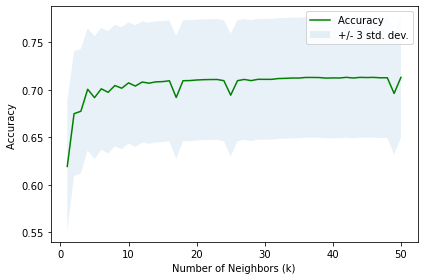

In [56]:
# Plot model accuracy for different number of neighbors k
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3 std. dev.'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

In [57]:
# Report best accuracy and corresponding value for k.
print( "The best accuracy was", mean_acc.max(), "with a number of neighbors k =", mean_acc.argmax()+1) 

The best accuracy was 0.7130472727272728 with a number of neighbors k = 42


In [58]:
# Build the most accurate KNN model by using a value of k that maximizes the Jaccard score.
k_best = mean_acc.argmax() + 1
print("Building KNeighborsClassifier with k =", k_best, " neighbors...")
start_time = time_now()
knn_clf = KNeighborsClassifier(n_neighbors = k_best, weights="uniform", algorithm="brute", leaf_size=30, p=1, metric="minkowski", metric_params=None, n_jobs=-1)
knn_clf.fit(X_train_transformed, y_train)
print("Completed in", elapsed_time(start_time), "seconds.")

Building KNeighborsClassifier with k = 42  neighbors...
Completed in 0.5500000007450581 seconds.


In [59]:
print_elapsed_time()

Elapsed time is 40832.47999999672 seconds.


## Evaluate the K Nearest Neighbor Model

# Build a Decision Tree Model

In [60]:
# Build a decision tree model from the training data previously generated.
start_time = time_now()
decision_tree = DecisionTreeClassifier(criterion="entropy")
decision_tree.fit(X_train_transformed, y_train)
print("Built Decision Tree Model in", elapsed_time(start_time), "seconds.")
print()

Built Decision Tree Model in 3.219999998807907 seconds.



In [61]:
print_elapsed_time()

Elapsed time is 40835.849999997765 seconds.


# Build a Support Vector Machine Model

In [62]:
# Build a support vector machine using 

In [63]:
# Build a support vector machine model from the training data previously generated using Linear Support Vector Classification.
start_time = time_now()
linear_svm_clf = LinearSVC(dual=False)
linear_svm_clf.fit(X_train_transformed, y_train)
print("Built Linear Support Vector Machine Model in", elapsed_time(start_time), "seconds.")
print()

Built Linear Support Vector Machine Model in 3.4899999983608723 seconds.



In [64]:
print_elapsed_time()

Elapsed time is 40839.699999999255 seconds.


# Build a Logistic Regression Model

In [65]:
# Build a logistic regression model from the training data previously generated.
start_time = time_now()
lr = LogisticRegression(n_jobs=-1).fit(X_train_transformed, y_train)
print("Built Logistic Regression Model in", elapsed_time(start_time), "seconds.")
print()

Built Logistic Regression Model in 3.75 seconds.



In [66]:
print_elapsed_time()

Elapsed time is 40843.609999999404 seconds.


# Evaluate the Various Models

In [67]:
pd.Series(y_test).value_counts(normalize=True, dropna=False)

1    0.661323636
2    0.320116364
2b   0.016436364
3    0.002123636
Length: 4, dtype: float64

In [68]:
start_time = time_now()
# Apply KNN to the test set, generate predictions for KNN.
print("Running command: y_knn_predictions = knn_clf.predict(X_test_transformed)")
y_knn_predictions = knn_clf.predict(X_test_transformed)
print("Completed in", elapsed_time(start_time), "seconds.")
print()

Running command: y_knn_predictions = knn_clf.predict(X_test_transformed)
Completed in 823.5799999982119 seconds.



In [69]:
y_knn_predictions.shape

(34375,)

In [70]:
pd.Series(y_knn_predictions).value_counts(normalize=True, dropna=False)

1   0.922443636
2   0.077556364
Length: 2, dtype: float64

In [71]:
# Apply Decision Tree to the test set, generate predictions for Decision Tree.
print("Running command: y_tree_predictions = decision_tree.predict(X_test_transformed)")
start_time = time_now()
y_tree_predictions = decision_tree.predict(X_test_transformed)
print("Completed in", elapsed_time(start_time), "seconds")
print()

Running command: y_tree_predictions = decision_tree.predict(X_test_transformed)
Completed in 0.019999999552965164 seconds



In [72]:
pd.Series(y_tree_predictions).value_counts(normalize=True, dropna=False)

1    0.919243636
2    0.080698182
2b   0.000058182
Length: 3, dtype: float64

In [73]:
# Apply Linear SVM to the test set, generate predictions for Linear SVM.
print("Running command: y_linear_svm_predictions = linear_svm_clf.predict(X_test_transformed)")
start_time = time_now()
y_linear_svm_predictions = linear_svm_clf.predict(X_test_transformed)
print("Completed in", elapsed_time(start_time), "seconds.")
print()

Running command: y_linear_svm_predictions = linear_svm_clf.predict(X_test_transformed)
Completed in 0.010000001639127731 seconds.



In [74]:
pd.Series(y_linear_svm_predictions).value_counts(normalize=True, dropna=False)

1   0.925061818
2   0.074938182
Length: 2, dtype: float64

In [75]:
# Apply Logistic Regression to the test set, generate predictions and probabilities for Logistic Regression.
print("Running command: y_lr_predictions = lr.predict(X_test_transformed)")
start_time = time_now()
y_lr_predictions = lr.predict(X_test_transformed)
print("Completed in", elapsed_time(start_time), "seconds.")
print()

print("Running command: y_lr_probabilities = lr.predict_proba(X_test_transformed)")
start_time = time_now()
y_lr_probabilities = lr.predict_proba(X_test_transformed)
print("Completed in", elapsed_time(start_time), "seconds.")
print()

Running command: y_lr_predictions = lr.predict(X_test_transformed)
Completed in 0.009999997913837433 seconds.

Running command: y_lr_probabilities = lr.predict_proba(X_test_transformed)
Completed in 0.019999999552965164 seconds.



In [76]:
pd.Series(y_lr_predictions).value_counts(normalize=True, dropna=False)

1   0.925003636
2   0.074996364
Length: 2, dtype: float64

In [77]:
# Define numpy arrays to store the results of tests of the various algorithms.
# index = 0 => KNN score
# index = 1 => Decision Tree
# index = 2 => Linear SVM
# index = 3 => Logistic Regression
jaccard = np.zeros((4,4))
f1 = np.zeros((4,4))
logloss = np.zeros((4,4))
logloss[0] = np.nan
logloss[1] = np.nan
logloss[2] = np.nan

In [78]:
# For KNN model, compute Jaccard score.
jaccard[0] = jaccard_score(y_test, y_knn_predictions, labels=["1", "2", "2b", "3"], average=None)
print("KNN Jaccard score is", jaccard[0,:])
# For KNN model, compute F1-score.
f1[0] = f1_score(y_test, y_knn_predictions, average=None)
print("KNN F1-score is", f1[0])
print()

KNN Jaccard score is [0.70014365 0.18058554 0.         0.        ]
KNN F1-score is [0.82362882 0.30592538 0.         0.        ]



In [79]:
# For Decision Tree model, compute Jaccard score.
jaccard[1] = jaccard_score(y_test, y_tree_predictions, labels=["1", "2", "2b", "3"], average=None)
print("Decision Tree Jaccard score is: ", jaccard[1])
# For Decision Tree model, compute F1-score.
f1[1] = f1_score(y_test, y_tree_predictions, average=None)
print("Decision Tree F1-score is: ", f1[1])
print()

Decision Tree Jaccard score is:  [0.69952141 0.18357529 0.00176678 0.        ]
Decision Tree F1-score is:  [0.82319812 0.31020467 0.00352734 0.        ]



In [80]:
# For Linear SVM algorithm, compute Jaccard score and mean accuracy.
jaccard[2] = jaccard_score(y_test, y_linear_svm_predictions, labels=["1", "2", "2b", "3"], average=None)
linear_svm_mean_accuracy = linear_svm_clf.score(X_test_transformed, y_test)
print("Linear SVM Jaccard score is", jaccard[2])
# For Linear SVM algorithm, compute F1-score.
f1[2] = f1_score(y_test, y_linear_svm_predictions, average=None)
print("Linear SVM F1-score is", f1[2])
print("Linear SVM mean accuracy is", linear_svm_mean_accuracy)
print()

Linear SVM Jaccard score is [0.70088269 0.17800139 0.         0.        ]
Linear SVM F1-score is [0.82413995 0.30220913 0.         0.        ]
Linear SVM mean accuracy is 0.7133963636363636



In [81]:
# For logistic regression algorithm, compute Jaccard score.
jaccard[3] = jaccard_score(y_test, y_lr_predictions, labels=["1", "2", "2b", "3"], average=None)
print("Logistic Regression Jaccard similarity score is", jaccard[3])
# For logistic regression algorithm, compute F1-score.
f1[3] = f1_score(y_test, y_lr_predictions, average=None)
print("Logistic Regression F1-score is", f1[3])
# For logistic regression algorithm, compute log loss.
logloss[3] = log_loss(y_test, y_lr_probabilities)
print("Logistic Regression log loss is", logloss[3])

Logistic Regression Jaccard similarity score is [0.70082031 0.17797051 0.         0.        ]
Logistic Regression F1-score is [0.82409683 0.30216463 0.         0.        ]
Logistic Regression log loss is [0.60296076 0.60296076 0.60296076 0.60296076]


In [82]:
# Classification report and Confusion matrix for KNN
print(classification_report(y_test, y_knn_predictions, labels=["1", "2", "2b", "3"], target_names=["1", "2", "2b", "3"]))
print(confusion_matrix(y_test, y_knn_predictions, labels=["1", "2", "2b", "3"], normalize="all"))

/home/chris/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.71      0.99      0.82     22733
           2       0.78      0.19      0.31     11004
          2b       0.00      0.00      0.00       565
           3       0.00      0.00      0.00        73

    accuracy                           0.71     34375
   macro avg       0.37      0.29      0.28     34375
weighted avg       0.72      0.71      0.64     34375

[[0.65221818 0.00910545 0.         0.        ]
 [0.25928727 0.06082909 0.         0.        ]
 [0.00971636 0.00672    0.         0.        ]
 [0.00122182 0.00090182 0.         0.        ]]


In [83]:
# Classification report and Confusion matrix for Decision Tree
print(classification_report(y_test, y_tree_predictions, labels=["1", "2", "2b", "3"], target_names=["1", "2", "2b", "3"]))
print(confusion_matrix(y_test, y_tree_predictions, labels=["1", "2", "2b", "3"], normalize="all"))

              precision    recall  f1-score   support

           1       0.71      0.98      0.82     22733
           2       0.77      0.19      0.31     11004
          2b       0.50      0.00      0.00       565
           3       0.00      0.00      0.00        73

    accuracy                           0.71     34375
   macro avg       0.49      0.29      0.28     34375
weighted avg       0.72      0.71      0.64     34375

[[6.50560000e-01 1.07636364e-02 0.00000000e+00 0.00000000e+00]
 [2.57920000e-01 6.21672727e-02 2.90909091e-05 0.00000000e+00]
 [9.54181818e-03 6.86545455e-03 2.90909091e-05 0.00000000e+00]
 [1.22181818e-03 9.01818182e-04 0.00000000e+00 0.00000000e+00]]


In [84]:
# Classification report and Confusion matrix for Linear SVM.
print(classification_report(y_test, y_linear_svm_predictions, labels=["1", "2", "2b", "3"], target_names=["1", "2", "2b", "3"]))
print(confusion_matrix(y_test, y_linear_svm_predictions, labels=["1", "2", "2b", "3"], normalize="all"))

              precision    recall  f1-score   support

           1       0.71      0.99      0.82     22733
           2       0.80      0.19      0.30     11004
          2b       0.00      0.00      0.00       565
           3       0.00      0.00      0.00        73

    accuracy                           0.71     34375
   macro avg       0.38      0.29      0.28     34375
weighted avg       0.72      0.71      0.64     34375

[[0.65370182 0.00762182 0.         0.        ]
 [0.26042182 0.05969455 0.         0.        ]
 [0.00968727 0.00674909 0.         0.        ]
 [0.00125091 0.00087273 0.         0.        ]]


In [85]:
# Classification report and Confusion matrix for Logisitic Regression
print(classification_report(y_test, y_lr_predictions, labels=["1", "2", "2b", "3"], target_names=["1", "2", "2b", "3"]))
print(confusion_matrix(y_test, y_lr_predictions, labels=["1", "2", "2b", "3"], normalize="all"))

              precision    recall  f1-score   support

           1       0.71      0.99      0.82     22733
           2       0.80      0.19      0.30     11004
          2b       0.00      0.00      0.00       565
           3       0.00      0.00      0.00        73

    accuracy                           0.71     34375
   macro avg       0.38      0.29      0.28     34375
weighted avg       0.72      0.71      0.64     34375

[[0.65364364 0.00768    0.         0.        ]
 [0.26042182 0.05969455 0.         0.        ]
 [0.00968727 0.00674909 0.         0.        ]
 [0.00125091 0.00087273 0.         0.        ]]


In [86]:
print("Notebook total elapsed time:", elapsed_time(), "seconds.")

Notebook total elapsed time: 41689.97999999672 seconds.
